In [14]:
# Ideas
# For one type of phone, calculate the distance for each individual WAP
# Calibrate for one phone model and then standardize signal for this one phone
# Refitting and updating parameters https://scikit-learn.org/stable/tutorial/basic/tutorial.html
# Merge train and validation and resample yourself/use CV
# Reverse prediction, use long, lat, floor and building to predict WAP signal strength

# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


In [5]:

# Set working directy, !set manually in top right corner
path = os.getcwd()
os.chdir(path) 


In [6]:

# Import data 
train = pd.read_csv(filepath_or_buffer = "./data/trainingData.csv")
val = pd.read_csv(filepath_or_buffer = "./data/validationData.csv")



In [7]:

# Check structure data
train.head()
train.describe()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [8]:

# Make col names lower case
train.columns = map(str.lower, train.columns)
val.columns = map(str.lower, val.columns)
names = list(train.columns)


In [9]:

# Check most dependant variables
long = train.loc[:,"longitude"]
lat = train.loc[:,"latitude"]
floor = train.loc[:,"floor"]
buildingid = train.loc[:,"buildingid"]
spaceid = train.loc[:,"spaceid"]
relativeposition = train.loc[:,"relativeposition"]


(array([1204., 3157.,  918., 1182., 1361.,  954., 1369., 2459., 3685.,
        3648.]),
 array([-7691.3384    , -7652.28645901, -7613.23451802, -7574.18257703,
        -7535.13063604, -7496.07869505, -7457.02675406, -7417.97481306,
        -7378.92287207, -7339.87093108, -7300.81899009]),
 <a list of 10 Patch objects>)

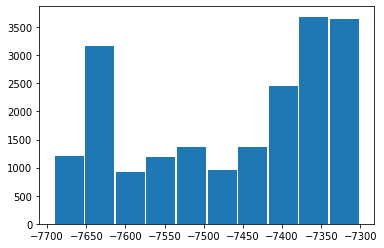

In [11]:

# Check distribution with histogram of most important variable
# !! Make histogram according to datatype, i.e. make one for categorical variables like id
plt.hist(long, rwidth=0.95)



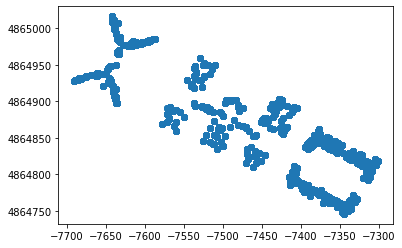

In [12]:

# Check scatterplot long vs lat
plt.scatter(long, lat)


In [ ]:

# Split in train and val data in features and Y data frames #519
train_feat = train.iloc[:, 0:520]
train_y = train.iloc[:, 520:len(train.columns)]
val_feat = val.iloc[:, 0:520]
val_y = val.iloc[:, 520:len(train.columns)]


In [ ]:

# Add column indicating val or training data and row bind both label data frames
train_y["validation"] = 0
val_y["validation"] = 1
join_y = train_y.append(val_y)
train_feat["validation"] = 0
val_feat["validation"] = 1
join_feat = train_feat.append(val_y)


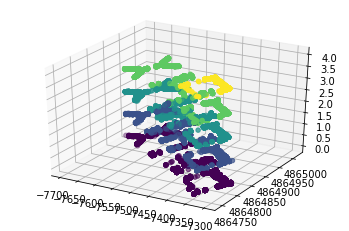

In [15]:

# visualize signal position with scatter plot in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xs= join_y.loc[:, "longitude"],
           ys= join_y.loc[:, "latitude"] ,
           zs= join_y.loc[:, "floor"],
           zdir= "z",
           c= join_y.loc[:, "floor"],
           cmap ="viridis")


In [ ]:

# Save to csv
train_feat.to_csv("./generated_data/train_feat.csv", index=False)
train_y.to_csv("./generated_data/train_y.csv", index=False)
val_feat.to_csv("./generated_data/val_feat.csv", index=False)
val_y.to_csv("./generated_data/val_y.csv", index=False)
join_feat.to_csv("./generated_data/join_feat.csv", index=False)
join_y.to_csv("./generated_data/join_y.csv", index=False)

In [1]:

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special

py.offline.init_notebook_mode(connected=True)

In [2]:
x = np.linspace(0, np.pi, 300)

layout = go.Layout(
    title='<b>SIMPLE EXAMPLE</b>',
    yaxis=dict(
        title='<i>(Volts)</i>'
    ),
    xaxis=dict(
        title='<i>(nanoseconds)</i>'
    )
)


def update_plot(signals, freq):
    
    """
    This function updates the plot everytime a widget is changed
    """

    data = []
    for s in signals:
        trace1 = go.Scatter(
            x=x,
            y=special.jv(s, freq * x),
            mode='lines',
            name='bessel {}'.format(s),
            line=dict(
                shape='spline'
            )
        )
        data.append(trace1)

    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    

signals = widgets.SelectMultiple(options=list(range(6)), value=(0, ), description='Bessel Order')
freq = widgets.FloatSlider(min=1, max=20, value=1, description='Freq')
widgets.interactive(update_plot, signals=signals, freq=freq)

interactive(children=(SelectMultiple(description='Bessel Order', index=(0,), options=(0, 1, 2, 3, 4, 5), value…